In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline
import seaborn as sns
from sklearn import preprocessing
from sklearn.cross_validation import train_test_split, KFold
from sklearn import metrics
import xgboost as xgb
import time
from scipy.stats import norm, lognorm
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt

In [76]:
data = pd.read_csv('input/train.csv')

In [77]:
test_data = pd.read_csv('input/test.csv')

In [78]:
mu = data['loss'].mean()
sigma = data['loss'].std()
data = data[(data['loss']- mu ) / sigma < 3]

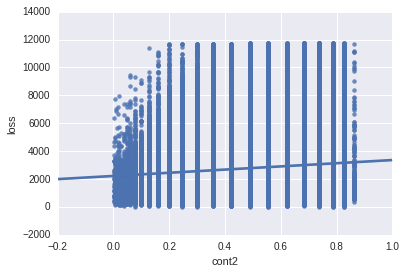

In [79]:
sns.regplot(data.cont2,data.loss)

In [12]:
tips = sns.load_dataset("tips")

In [13]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [80]:
data.corr()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
id,1.000000,0.002374,0.000673,0.000877,0.002365,0.000914,0.001853,0.002239,0.005636,0.002266,0.003023,0.001336,0.001163,0.001127,-0.005209,-0.000806
cont1,0.002374,1.000000,-0.086084,-0.445739,0.367092,-0.026904,0.758448,0.372800,0.360784,0.929662,0.808882,0.600279,0.618301,0.533174,0.056446,-0.022555
cont2,0.000673,-0.086084,1.000000,0.455022,0.040079,0.193995,0.013180,0.042289,0.136785,-0.034071,0.062029,0.112586,0.101999,0.023603,-0.046239,0.107156
cont3,0.000877,-0.445739,0.455022,1.000000,-0.341046,0.093218,-0.353002,0.088480,-0.186067,-0.418210,-0.327669,0.018320,-0.000701,-0.416981,-0.040542,0.081097
cont4,0.002365,0.367092,0.040079,-0.341046,1.000000,0.162806,0.221918,-0.110908,0.528736,0.328723,0.283136,0.123252,0.132614,0.177661,0.017719,-0.029570
cont5,0.000914,-0.026904,0.193995,0.093218,0.162806,1.000000,-0.150689,-0.248216,0.008442,-0.089954,-0.066179,-0.150728,-0.147246,-0.086051,-0.021885,-0.001851
cont6,0.001853,0.758448,0.013180,-0.353002,0.221918,-0.150689,1.000000,0.662385,0.438284,0.797736,0.883356,0.776231,0.787610,0.816465,0.042130,0.007888
cont7,0.002239,0.372800,0.042289,0.088480,-0.110908,-0.248216,0.662385,1.000000,0.144777,0.388290,0.496550,0.746581,0.742365,0.296531,0.021866,0.054381
cont8,0.005636,0.360784,0.136785,-0.186067,0.528736,0.008442,0.438284,0.144777,1.000000,0.452759,0.336292,0.304546,0.317945,0.477875,0.043995,0.020427
cont9,0.002266,0.929662,-0.034071,-0.418210,0.328723,-0.089954,0.797736,0.388290,0.452759,1.000000,0.785928,0.611497,0.630063,0.642154,0.073942,-0.000910


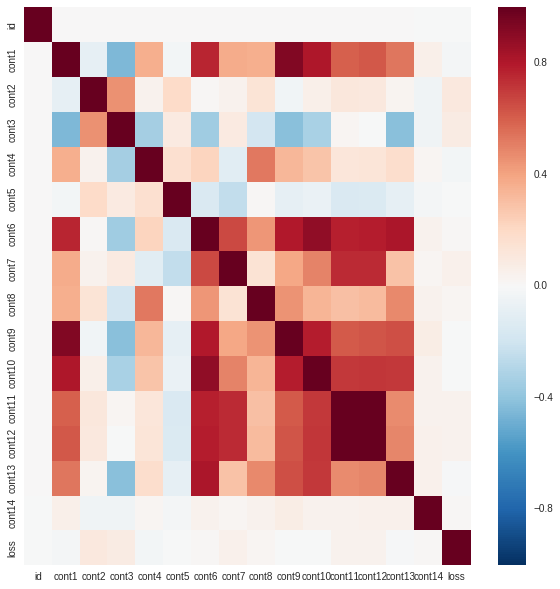

In [81]:
correlation = data.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(correlation)

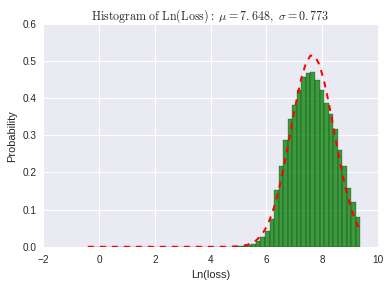

In [82]:


data['log_loss'] = np.log(data['loss'])

# fit the normal distribution on ln(loss)
(mu, sigma) = norm.fit(data['log_loss'])

# the histogram of the ln(loss)
n, bins, patches = plt.hist(data['log_loss'], 60, normed=1, facecolor='green', alpha=0.75)

# add the fitted line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Ln(loss)')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Ln(Loss):}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

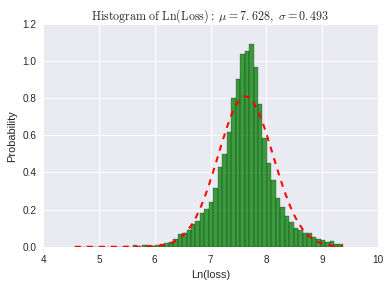

In [83]:
mean1 = data.groupby(['cont14'])['log_loss'].mean()

(mu, sigma) = norm.fit(mean1)

# the histogram of the ln(loss)
n, bins, patches = plt.hist(mean1, 60, normed=1, facecolor='green', alpha=0.75)

# add the fitted line
y = mlab.normpdf( bins, mu, sigma)
l = plt.plot(bins, y, 'r--', linewidth=2)

#plot
plt.xlabel('Ln(loss)')
plt.ylabel('Probability')
plt.title(r'$\mathrm{Histogram\ of\ Ln(Loss):}\ \mu=%.3f,\ \sigma=%.3f$' %(mu, sigma))
plt.grid(True)

plt.show()

In [ ]:
# cont1, 4, 6, 7, 14 
# 5, 8, 9, 
# log_loss ke saath better aa raha hai..  some attributes doesnt relate at all


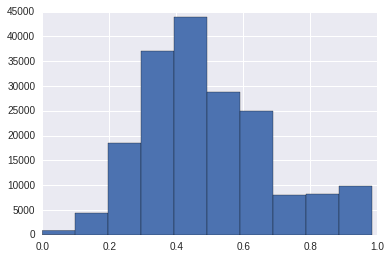

In [85]:
data['cont1'].hist()

In [87]:
from scipy.stats import skew, boxcox

numeric_feats = data.dtypes[data.dtypes != "object"].index
# compute skew and do Box-Cox transformation
skewed_feats = data[numeric_feats].apply(lambda x: skew(x.dropna()))
print("\nSkew in numeric features:")
print(skewed_feats)
skewed_feats = skewed_feats[skewed_feats > 0.25]
skewed_feats = skewed_feats.index
for feats in skewed_feats:
    data[feats] = data[feats] + 1
    data[feats], lam = boxcox(data[feats])
features = data.columns
cats = [feat for feat in features if 'cat' in feat]
# factorize categorical features
for feat in cats:
    data[feat] = pd.factorize(data[feat], sort=True)[0]
x_train = data.iloc[:ntrain, :]
x_test = data.iloc[ntrain:, :]
train_test_scaled, scaler = scale_data(train_test)
train, _ = scale_data(x_train, scaler)
test, _ = scale_data(x_test, scaler)

 train_ids = train_loader['id'].values.astype(np.int32)
test_ids = test_loader['id'].values.astype(np.int32)


Skew in numeric features:
id         -0.001861
cont1       0.514080
cont2      -0.295371
cont3      -0.007844
cont4       0.411462
cont5       0.678287
cont6       0.466507
cont7       0.835907
cont8       0.679845
cont9       1.075533
cont10      0.360493
cont11      0.290450
cont12      0.301199
cont13      0.383100
cont14      0.252527
loss        1.508979
log_loss   -0.065591
dtype: float64


In [48]:
data.groupby(['cat1'])['log_loss'].mean()

cat1
A    7.764114
B    7.304845
Name: log_loss, dtype: float64

In [ ]:
data['cat1'].apply( lambda x : data[data['cat1'] == x]['log_loss'].mean() ) 

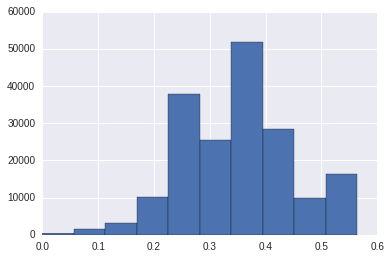

In [88]:
data['cont1'].hist()